# Python notebook to reproduce _Figure 5_

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import os

import plot_settings
import plot_utils

In [2]:
fig_dir = 'figure_5/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Code to reproduce figure 5b-e

Fig. 5b

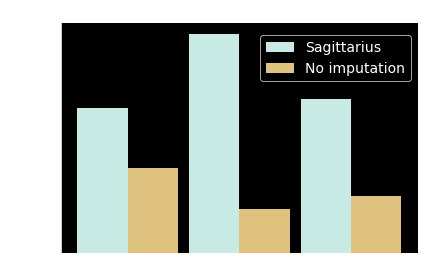

In [12]:
%matplotlib inline

meas_df = pd.read_csv('results/LINCS/GDSC:no_imputation_predictions.csv')
sag_df = pd.read_csv('results/LINCS/GDSC:sagittarius_predictions.csv')

sag_point = []
meas_point = []
sag_sizes = []
meas_sizes = []
kept_cls = []
ucls = np.unique(meas_df['cell_line'].tolist())
for cl in sorted(ucls):
    sp_sag = spearmanr(
        sag_df[sag_df['cell_line'] == cl]['pred'], sag_df[sag_df['cell_line'] == cl]['target'])
    sp_meas = spearmanr(
        meas_df[meas_df['cell_line'] == cl]['pred'], meas_df[meas_df['cell_line'] == cl]['target'])
    
    if sp_sag[1] < 0.05 / len(ucls) or sp_meas[1] < 0.05 / len(ucls):
        sag_point.append(sp_sag[0])
        meas_point.append(sp_meas[0])
        sag_sizes.append(len(sag_df[sag_df['cell_line'] == cl]))
        meas_sizes.append(len(meas_df[meas_df['cell_line'] == cl]))
        kept_cls.append(cl)

# barplot version (only 3 cell lines)
ax = plot_settings.get_wider_axis()
plot_utils.grouped_barplot(ax, [[sag_point[i], meas_point[i]] for i in range(len(sag_point))],
                           kept_cls, xlabel='', ylabel='Spearman',
                           nested_color=[plot_settings.get_sag_vs_baseline_colors(mod) for mod in ['Sagittarius', 'baseline']],
                           color_legend=[plot_settings.get_model_name_conventions('Sagittarius'),
                                         'No imputation'],
                           tickloc_top=False, rotangle=0, min_val=-0.25)
plot_utils.format_legend(ax, *ax.get_legend_handles_labels())
plot_utils.put_legend_outside_plot(ax, anchorage=(1, 0.98))
plot_utils.format_ax(ax)
plt.title('GDSC')
plt.tight_layout()
plt.savefig(fig_dir + 'figure_5b.pdf')

Fig. 5c

/homes/gws/addiewc/anaconda3/envs/Sagittarius/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


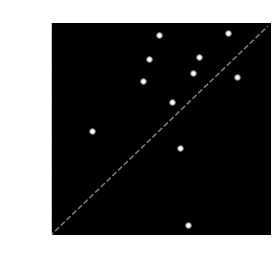

In [17]:
meas_df = pd.read_csv('results/LINCS/CTRP:no_imputation_predictions.csv')
sag_df = pd.read_csv('results/LINCS/CTRP:sagittarius_predictions.csv')

sag_point = []
meas_point = []
ucls = np.unique(meas_df['cell_line'].tolist())
for cl in sorted(ucls):
    sp_sag = spearmanr(
        sag_df[sag_df['cell_line'] == cl]['pred'], sag_df[sag_df['cell_line'] == cl]['target'])
    sp_meas = spearmanr(
        meas_df[meas_df['cell_line'] == cl]['pred'], meas_df[meas_df['cell_line'] == cl]['target'])
    
    if sp_sag[1] < 0.05 / len(ucls) or sp_meas[1] < 0.05 / len(ucls):
        sag_point.append(sp_sag[0])
        meas_point.append(sp_meas[0])
        
ax = plot_settings.get_square_axis()
plot_utils.scatter_plot(ax, xs=meas_point, ys=sag_point, color='white',
                        xlabel='Spearman without imputation', ylabel='Sagittarius Spearman',
                        size=30, edge_color='gray')
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
min0 = min(x0, y0)
max1 = max(x1, y1)

ax.set_xlim(min0, max1)
ax.set_ylim(min0, max1)

plot_utils.show_x_equals_y(ax, color='gray', domain=(min0, max1))
plot_utils.align_axes_ticks(ax, use_y=False, ticks_to_use=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.title('CTRP')
plt.tight_layout()
plot_utils.format_ax(ax)
plt.savefig(fig_dir + 'figure_5c.pdf')

Fig. 5d

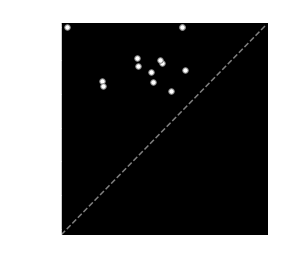

In [21]:
meas_df = pd.read_csv('results/LINCS/DEMETER:no_imputation_predictions.csv')
sag_df = pd.read_csv('results/LINCS/DEMETER:sagittarius_predictions.csv')

sag_point = []
meas_point = []
ucls = np.unique(meas_df['cell_line'].tolist())
for cl in sorted(ucls):
    sp_sag = spearmanr(
        sag_df[sag_df['cell_line'] == cl]['pred'], sag_df[sag_df['cell_line'] == cl]['target'])
    sp_meas = spearmanr(
        meas_df[meas_df['cell_line'] == cl]['pred'], meas_df[meas_df['cell_line'] == cl]['target'])
    
    if sp_sag[1] < 0.05 / len(ucls) or sp_meas[1] < 0.05 / len(ucls):
        sag_point.append(sp_sag[0])
        meas_point.append(sp_meas[0])
        
ax = plot_settings.get_square_axis()
plot_utils.scatter_plot(ax, xs=meas_point, ys=sag_point, color='white',
                        xlabel='Spearman without imputation', ylabel='Sagittarius Spearman',
                        size=30, edge_color='gray')
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
min0 = min(x0, y0)
max1 = max(x1, y1)

ax.set_xlim(min0, max1)
ax.set_ylim(min0, max1)

plot_utils.show_x_equals_y(ax, color='gray', domain=(min0, max1))
plot_utils.align_axes_ticks(ax, use_y=False, ticks_to_use=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.title('DEMETER')
plt.tight_layout()
plot_utils.format_ax(ax)
plt.savefig(fig_dir + 'figure_5d.pdf')

Fig. 5e

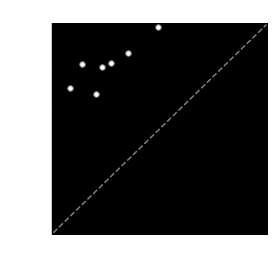

In [22]:
meas_df = pd.read_csv('results/LINCS/CERES:no_imputation_predictions.csv')
sag_df = pd.read_csv('results/LINCS/CERES:sagittarius_predictions.csv')

sag_point = []
meas_point = []
ucls = np.unique(meas_df['cell_line'].tolist())
for cl in sorted(ucls):
    sp_sag = spearmanr(
        sag_df[sag_df['cell_line'] == cl]['pred'], sag_df[sag_df['cell_line'] == cl]['target'])
    sp_meas = spearmanr(
        meas_df[meas_df['cell_line'] == cl]['pred'], meas_df[meas_df['cell_line'] == cl]['target'])
    
    if sp_sag[1] < 0.05 / len(ucls) or sp_meas[1] < 0.05 / len(ucls):
        sag_point.append(sp_sag[0])
        meas_point.append(sp_meas[0])
        
ax = plot_settings.get_square_axis()
plot_utils.scatter_plot(ax, xs=meas_point, ys=sag_point, color='white',
                        xlabel='Spearman without imputation', ylabel='Sagittarius Spearman',
                        size=30, edge_color='gray')
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
min0 = min(x0, y0)
max1 = max(x1, y1)

ax.set_xlim(min0, max1)
ax.set_ylim(min0, max1)

plot_utils.show_x_equals_y(ax, color='gray', domain=(min0, max1))
plot_utils.align_axes_ticks(ax, use_y=False, ticks_to_use=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.title('CERES')
plt.tight_layout()
plot_utils.format_ax(ax)
plt.savefig(fig_dir + 'figure_5e.pdf')